# 正規行列

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
df = df[(df[['x','y','z']] != 0).all(axis=1)]
len(df)

53920

Text(0, 0.5, 'price')

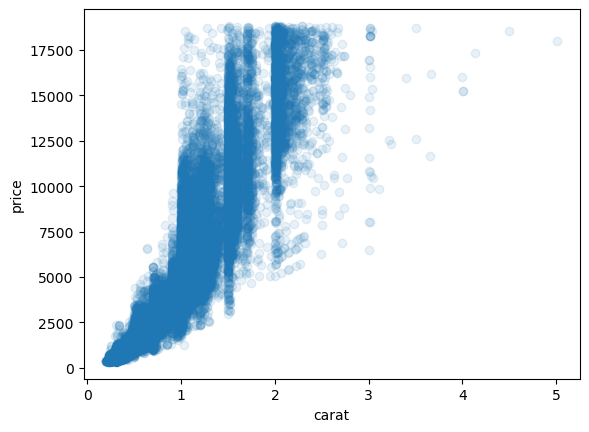

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

carat = df['carat'].values
price = df['price'].values

plt.scatter(carat, price, alpha=0.1)
plt.xlabel('carat')
plt.ylabel('price')


In [6]:
X = np.vstack([np.ones(len(carat)), carat]).T
y = price
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta_best

array([-2255.76878704,  7755.76725406])

Text(0, 0.5, 'price')

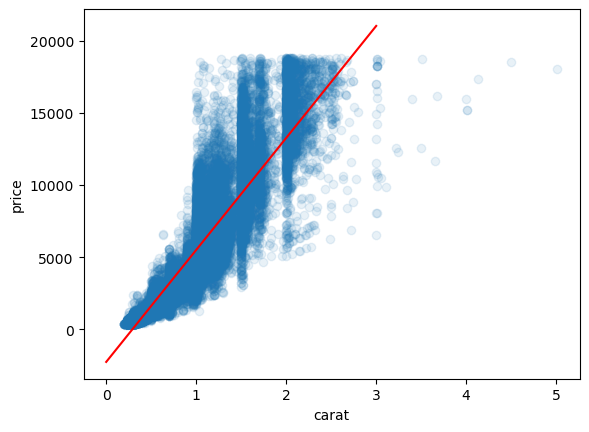

In [7]:
x_axis = np.linspace(0, 3, 10)
y_pred = theta_best[0] + theta_best[1] * x_axis

plt.scatter(carat, price, alpha=0.1)
plt.plot(x_axis, y_pred, 'red')
plt.xlabel('carat')
plt.ylabel('price')

In [8]:
from sklearn.linear_model import LinearRegression

X = df['carat'].values
y = df['price'].values

In [9]:
print(X.shape, y.shape)

(53920,) (53920,)


In [10]:
#mXnの形にする
X = X.reshape(-1, 1)
X

array([[0.23],
       [0.21],
       [0.23],
       ...,
       [0.7 ],
       [0.86],
       [0.75]])

In [11]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [12]:
# 線形回帰の切片と係数
print(model.coef_, model.intercept_ )

[7755.76725406] -2255.768787037974


In [13]:
#　xにある値を入れてyを予測する
X_new = np.array(2).reshape(-1, 1)
model.predict(X_new)

array([13255.76572108])

## 係数の有意差検定

In [16]:
X = df['depth'].values
y = df['price'].values

model = LinearRegression()
X = X.reshape(-1, 1)
model.fit(X, y)
print(model.coef_, model.intercept_)

[-29.86685265] 5775.2568692127525


In [27]:
# 1列目に値1のベクトルを追加し、Xと横に結合
X_ = np.append(np.ones((len(X), 1)), X, axis=1)
theta = np.append(model.intercept_, model.coef_)
y_preds = model.predict(X)

In [38]:
# Residual sum of square:残差平方和
RSS = np.sum((y - y_preds)**2)

# Redidual standard error : 残差標準誤差
RSE = np.sqrt(RSS / (len(X_) - len(X_[0])))

# Standard error : 標準誤差
SE_sq = RSE**2 * np.linalg.inv(np.dot(X_.T, X_)).diagonal() #なぜ要素の2乗の対格成分だけ抽出？？？？？？？？？

In [39]:
t = theta / np.sqrt(SE_sq)
print(t)

[ 7.79972831 -2.4914259 ]
